# Before you start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
#!pip install -U scipy

In [2]:
# import numpy and pandas
import pandas as pd 
import numpy as np

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the San Francisco. We will start by loading the dataset and examining its contents. 

In [3]:
# Your code here:
data=pd.read_csv('Salaries.csv')

/Users/silviadifra/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Examine the `salaries` dataset using the `head` function below.

In [4]:
# Your code here:
data.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


We see from looking at the `head` function that there is quite a bit of missing data. Get the amount of missing data in every column

In [5]:
# Your code here:
data.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

Get the shape of the dataframe

In [6]:
# Your code here
data.shape

(148654, 13)

Given output of the previous two cells, drop the corresponding column and compute again the amount of missing values.

In [7]:
# Your code here
data=data.drop(['Notes'], axis =1)
data.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Agency                   0
Status              110535
dtype: int64

Check out what are the possible values of the column "Status".

In [8]:
# Your code here
data['Status'].unique()

array([nan, 'PT', 'FT'], dtype=object)

Drop any row with missing values in the "Status" column and compute again the number of missing values.

In [9]:
# Your code here
data=data[data['Status'].isna()==False]

In [10]:
# Your code here
data.isna().sum()

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
Status              0
dtype: int64

Check out the types of each column and see if they make sense.

In [11]:
# Your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38119 entries, 110531 to 148653
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                38119 non-null  int64  
 1   EmployeeName      38119 non-null  object 
 2   JobTitle          38119 non-null  object 
 3   BasePay           38119 non-null  object 
 4   OvertimePay       38119 non-null  object 
 5   OtherPay          38119 non-null  object 
 6   Benefits          38119 non-null  object 
 7   TotalPay          38119 non-null  float64
 8   TotalPayBenefits  38119 non-null  float64
 9   Year              38119 non-null  int64  
 10  Agency            38119 non-null  object 
 11  Status            38119 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 3.8+ MB


In [12]:
# Your code here
data.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
110531,110532,David Shinn,Deputy Chief 3,129150.01,0.0,342802.63,38780.04,471952.64,510732.68,2014,San Francisco,PT
110532,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,San Francisco,FT
110533,110534,William J Coaker Jr.,Chief Investment Officer,257340.0,0.0,82313.7,96570.66,339653.70,436224.36,2014,San Francisco,PT
110534,110535,Gregory P Suhr,Chief of Police,307450.04,0.0,19266.72,91302.46,326716.76,418019.22,2014,San Francisco,FT
110535,110536,Joanne M Hayes-White,"Chief, Fire Department",302068.0,0.0,24165.44,91201.66,326233.44,417435.10,2014,San Francisco,FT


Do any type conversions and reset the index.

In [13]:
# Your code here
data['BasePay']=pd.to_numeric(data['BasePay'], errors='coerce')
data['OvertimePay']=pd.to_numeric(data['OvertimePay'], errors='coerce')
data['OtherPay']=pd.to_numeric(data['OtherPay'], errors='coerce')
data['Benefits']=pd.to_numeric(data['Benefits'], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38119 entries, 110531 to 148653
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                38119 non-null  int64  
 1   EmployeeName      38119 non-null  object 
 2   JobTitle          38119 non-null  object 
 3   BasePay           38119 non-null  float64
 4   OvertimePay       38119 non-null  float64
 5   OtherPay          38119 non-null  float64
 6   Benefits          38119 non-null  float64
 7   TotalPay          38119 non-null  float64
 8   TotalPayBenefits  38119 non-null  float64
 9   Year              38119 non-null  int64  
 10  Agency            38119 non-null  object 
 11  Status            38119 non-null  object 
dtypes: float64(6), int64(2), object(4)
memory usage: 3.8+ MB


In [14]:
from datetime import date

In [15]:
data['Year'] = pd.to_datetime(data['Year'], errors='coerce')

In [16]:
data['Year'] = data.Year.apply(lambda x: x.year)

In [17]:
# Your code here
data=data.reset_index(drop=True)
data.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,110532,David Shinn,Deputy Chief 3,129150.01,0.00,342802.63,38780.04,471952.64,510732.68,1970,San Francisco,PT
1,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,1970,San Francisco,FT
2,110534,William J Coaker Jr.,Chief Investment Officer,257340.00,0.00,82313.70,96570.66,339653.70,436224.36,1970,San Francisco,PT
3,110535,Gregory P Suhr,Chief of Police,307450.04,0.00,19266.72,91302.46,326716.76,418019.22,1970,San Francisco,FT
4,110536,Joanne M Hayes-White,"Chief, Fire Department",302068.00,0.00,24165.44,91201.66,326233.44,417435.10,1970,San Francisco,FT


Check out if "TotalPayBenefits" = "BasePay" + "OvertimePay" + "OtherPay" + "Benefits"

In [18]:
# Your code here
data['totalpaybenefits_check']= data['BasePay']+data['OvertimePay']+data['OtherPay']+data['Benefits']

In [19]:
data['TotalPayBenefits']==data['totalpaybenefits_check']

0         True
1        False
2         True
3        False
4         True
         ...  
38114     True
38115     True
38116     True
38117     True
38118     True
Length: 38119, dtype: bool

What is the percetage of employees for which the previous assumption is not True?

In [20]:
# Your code here:
(data['TotalPayBenefits']==data['totalpaybenefits_check']).value_counts()

True     28097
False    10022
dtype: int64

In [21]:
(((data['TotalPayBenefits']==data['totalpaybenefits_check']).value_counts())/len(data))*100

True     73.708649
False    26.291351
dtype: float64

There are different departments in the city. List all departments and the count of employees in each department.

In [22]:
# Your code here:
employeedepartmentalcount=data.groupby("JobTitle").agg({"Id": pd.Series.nunique})


In [23]:
employeedepartmentalcount=employeedepartmentalcount.rename(columns={'Id':'Employees'})
display(employeedepartmentalcount.head())

,Employees
JobTitle,
"ACPO,JuvP, Juv Prob (SFERS)",1
ASR Senior Office Specialist,22
ASR-Office Assistant,15
Account Clerk,93
Accountant I,2


# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of **all FT workers is significantly different from $75/hr**. Get first the hourly wage by dividing "TotalPayBenefits" by 50 weeks (assuming 10 labour days of holidays) and by 40hrs (assuming a 40hrs week).

$$Hourly Wage = \frac{TotalPayBenefits}{1 year}\frac{1 year}{50 Week}\frac{1 Week}{40 hr}$$

Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

In [24]:
import scipy.stats as st

In [25]:
# Your code here: (compute the "Hourly_Wage")
data['Hourly_wage']=data['TotalPayBenefits']/(50*40)
display(data)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status,totalpaybenefits_check,Hourly_wage
0,110532,David Shinn,Deputy Chief 3,129150.01,0.00,342802.63,38780.04,471952.64,510732.68,1970,San Francisco,PT,510732.68,255.366340
1,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,1970,San Francisco,FT,479652.21,239.826105
2,110534,William J Coaker Jr.,Chief Investment Officer,257340.00,0.00,82313.70,96570.66,339653.70,436224.36,1970,San Francisco,PT,436224.36,218.112180
3,110535,Gregory P Suhr,Chief of Police,307450.04,0.00,19266.72,91302.46,326716.76,418019.22,1970,San Francisco,FT,418019.22,209.009610
4,110536,Joanne M Hayes-White,"Chief, Fire Department",302068.00,0.00,24165.44,91201.66,326233.44,417435.10,1970,San Francisco,FT,417435.10,208.717550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38114,148646,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.00,0.00,0.00,1970,San Francisco,PT,0.00,0.000000
38115,148648,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.00,0.00,0.00,1970,San Francisco,PT,0.00,0.000000
38116,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,1970,San Francisco,PT,0.00,0.000000
38117,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,1970,San Francisco,PT,0.00,0.000000


In [26]:
# Your code here: (Compute the mean hourly wage for all the "FT" employees)


In [27]:
mean_hourly_wage =data.groupby("Status").agg({"Hourly_wage": pd.Series.mean})
mean_hourly_wage.head()

,Hourly_wage
Status,
FT,69.264206
PT,23.058987


In [28]:
mean_hourly_wage.loc['FT','Hourly_wage']

69.264206407271

In [29]:
# Your code here: (compute the t_statistic). Take into account that this dataset is a sample of a real population.
# Remember that you only need to consider "FT" employees

In [30]:
data_FT=(data[data['Status']=='FT'])
data_FT.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status,totalpaybenefits_check,Hourly_wage
1,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,1970,San Francisco,FT,479652.21,239.826105
3,110535,Gregory P Suhr,Chief of Police,307450.04,0.00,19266.72,91302.46,326716.76,418019.22,1970,San Francisco,FT,418019.22,209.009610
4,110536,Joanne M Hayes-White,"Chief, Fire Department",302068.00,0.00,24165.44,91201.66,326233.44,417435.10,1970,San Francisco,FT,417435.10,208.717550
5,110537,Ellen G Moffatt,Asst Med Examiner,270222.04,6009.22,67956.20,71580.48,344187.46,415767.94,1970,San Francisco,FT,415767.94,207.883970
6,110538,John L Martin,Dept Head V,311298.55,0.00,0.00,89772.32,311298.55,401070.87,1970,San Francisco,FT,401070.87,200.535435


In [31]:
from scipy.stats import ttest_1samp
#import scipy.stats as st

In [32]:
stat=(np.mean(data_FT['Hourly_wage']) - 75)/ (np.std(data_FT['Hourly_wage'], ddof=1)/np.sqrt(len(data_FT)))

In [33]:
stat

-35.80631941460788

In [34]:
# Method 1: Critical value. Get the critical value and compare it against your statisttic.
# Your code here: 

In [35]:
st.t.ppf(0.05/2,df=len(data_FT['Hourly_wage'])-1)

-1.9600702128845597

the statistic at -35.806 is < -1.96. So reject H0

In [36]:
st.t.ppf(1-(0.05/2),df=len(data_FT['Hourly_wage'])-1)

1.9600702128845593

same as the other side to define the postive critical value on a two sided test. 

In [37]:
# Method 2: Use the p-value method.
# Your code here:


In [38]:
st.t.cdf(stat,df=len(data_FT)-1) 
# this is to be compared to pval/2. this is less than < 0.025. 
#this is to be compared to alpha/2, where as pval is compared to the alpha value

2.2589156167195097e-273

we compared (-1.960/1.96, 1-0.025,0.025) with (-35.80/35.80, 1-2.258e-273,2.258-273)

if stat< critical value or stat > critical value > reject H0

therefore

stat<scipy.stats.t.ppf(0.05/2,df=len(patients)-1) or

stat >scipy.stats.t.ppf(1-(0.05/2),df=len(patients)-1) reject H0

this is equivalent to using the pvalues as follows:

if pval < alpha reject the H0

which is equal to:

if scipy.stats.t.cdf(stat,df=len(patients)-1) < alpha/2: reject the null hypothesis

In [39]:
# Method 3: Use the ttest_1samp function from scipy. 
# Check the documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html)
# Make sure that you have a scipy version >=1.6.0. If that's not your case please ugrade your scipy version using
# !pip install -U scipy
# Your code here:

In [40]:
stat, pval = ttest_1samp(data_FT['Hourly_wage'], popmean = 75, alternative = "two-sided")
print(stat)
print(pval) #pval # this is compared straight forward to alpha ( in our case 0.05)

-35.80631941460526
4.517831233839447e-273


Are all the methods in agreement?

We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are **higher than last year's mean of $86000/year for all salaried employees** (use the column "TotalPayBenefits". Test  hypothesis using a 95% confidence interval.

Hint: Use apply and a lambda function to check in "Police" is in the "JobTitle" to get all the "Police" jobs.

In [41]:
data1=data.copy()

In [42]:
data1.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status,totalpaybenefits_check,Hourly_wage
0,110532,David Shinn,Deputy Chief 3,129150.01,0.00,342802.63,38780.04,471952.64,510732.68,1970,San Francisco,PT,510732.68,255.366340
1,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,1970,San Francisco,FT,479652.21,239.826105
2,110534,William J Coaker Jr.,Chief Investment Officer,257340.00,0.00,82313.70,96570.66,339653.70,436224.36,1970,San Francisco,PT,436224.36,218.112180
3,110535,Gregory P Suhr,Chief of Police,307450.04,0.00,19266.72,91302.46,326716.76,418019.22,1970,San Francisco,FT,418019.22,209.009610
4,110536,Joanne M Hayes-White,"Chief, Fire Department",302068.00,0.00,24165.44,91201.66,326233.44,417435.10,1970,San Francisco,FT,417435.10,208.717550


WITH LAMBDA

In [53]:
policejoblambda = data1[data1['JobTitle'].apply(lambda x: 'Police' in str(x))]

In [55]:
policejoblambda.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status,totalpaybenefits_check,Hourly_wage
3,110535,Gregory P Suhr,Chief of Police,307450.04,0.00,19266.72,91302.46,326716.76,418019.22,1970,San Francisco,FT,418019.22,209.009610
86,110618,Jay K Dowke,Police Officer 3,100148.75,15716.42,152037.57,33847.07,267902.74,301749.81,1970,San Francisco,PT,301749.81,150.874905
143,110675,Sam W Yuen,Police Officer 2,116584.02,115346.62,18834.23,38350.08,250764.87,289114.95,1970,San Francisco,FT,289114.95,144.557475
181,110713,Malcolm S Fong,Police Officer 3,118898.14,109310.13,12557.94,39456.55,240766.21,280222.76,1970,San Francisco,FT,280222.76,140.111380
300,110832,Murray P Daggs,Police Officer 3,118898.13,98583.98,10919.81,38833.08,228401.92,267235.00,1970,San Francisco,FT,267235.00,133.617500


WITHOUT LAMBDA

In [48]:
#policejob = data1['JobTitle'].str.contains('Police',case=False, na=False)

In [49]:
#policejob

0        False
1        False
2        False
3         True
4        False
         ...  
38114    False
38115    False
38116    False
38117    False
38118    False
Name: JobTitle, Length: 38119, dtype: bool

In [50]:
#data2=data1[policejob]

In [51]:
#data2.shape

(1901, 14)

In [52]:
data2.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status,totalpaybenefits_check,Hourly_wage
3,110535,Gregory P Suhr,Chief of Police,307450.04,0.00,19266.72,91302.46,326716.76,418019.22,1970,San Francisco,FT,418019.22,209.009610
86,110618,Jay K Dowke,Police Officer 3,100148.75,15716.42,152037.57,33847.07,267902.74,301749.81,1970,San Francisco,PT,301749.81,150.874905
143,110675,Sam W Yuen,Police Officer 2,116584.02,115346.62,18834.23,38350.08,250764.87,289114.95,1970,San Francisco,FT,289114.95,144.557475
181,110713,Malcolm S Fong,Police Officer 3,118898.14,109310.13,12557.94,39456.55,240766.21,280222.76,1970,San Francisco,FT,280222.76,140.111380
300,110832,Murray P Daggs,Police Officer 3,118898.13,98583.98,10919.81,38833.08,228401.92,267235.00,1970,San Francisco,FT,267235.00,133.617500


In [35]:
#data2=data2.reset_index(drop=True)

In [57]:
data2=policejoblambda.reset_index(drop=True)

In [58]:
data2.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status,totalpaybenefits_check,Hourly_wage
0,110535,Gregory P Suhr,Chief of Police,307450.04,0.00,19266.72,91302.46,326716.76,418019.22,1970,San Francisco,FT,418019.22,209.009610
1,110618,Jay K Dowke,Police Officer 3,100148.75,15716.42,152037.57,33847.07,267902.74,301749.81,1970,San Francisco,PT,301749.81,150.874905
2,110675,Sam W Yuen,Police Officer 2,116584.02,115346.62,18834.23,38350.08,250764.87,289114.95,1970,San Francisco,FT,289114.95,144.557475
3,110713,Malcolm S Fong,Police Officer 3,118898.14,109310.13,12557.94,39456.55,240766.21,280222.76,1970,San Francisco,FT,280222.76,140.111380
4,110832,Murray P Daggs,Police Officer 3,118898.13,98583.98,10919.81,38833.08,228401.92,267235.00,1970,San Francisco,FT,267235.00,133.617500


In [ ]:
# Your code here: (compute the t_statistic). Take into account that this dataset is a sample of a real population.
# Remember that you only need to consider "Police" employees

In [59]:
stat=(np.mean(data2['TotalPayBenefits']) - 86000)/ (np.std(data2['TotalPayBenefits'], ddof=1)/np.sqrt(len(data2)))
stat

50.252984742109916

50.252984742109916

In [60]:
# Method 1: Critical value. Get the critical value and compare it against your statisttic.
# Your code here: 

In [61]:
st.t.ppf(0.05,df=len(data2['TotalPayBenefits'])-1)

-1.645656004264731

In [62]:
# Method 2: Use the p-value method.
# Your code here:

In [63]:
st.t.cdf(stat,df=len(data2['TotalPayBenefits'])-1) 

1.0

In [64]:
# Method 3: Use the ttest_1samp function from scipy. 
# Check the documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html)
# Make sure that you have a scipy version >=1.6.0. If that's not your case please ugrade your scipy version using
# !pip install -U scipy
# Your code here:

In [65]:
stat, pval = ttest_1samp(data2['TotalPayBenefits'], popmean = 86000, alternative = "less")
print(stat,pval)

50.252984742109945 1.0


Ttest_1sampResult(statistic=50.252984742109945, pvalue=1.0)

Given the pvalue of 1>0.05,  and stats = 50.25>t criticcal @ -1.64, we accept H0 that states police pay is >86000 USDs

The workers from the "JobTitle" with the most employees have complained that their hourly wage is **less than $35/hour**. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

In [ ]:
# Your code here: (Get the department which has most employees)

In [66]:
employeedepartmentalcount=data.groupby("JobTitle").agg({"Id": pd.Series.nunique})

In [67]:
employeedepartmentalcount=employeedepartmentalcount.rename(columns={'Id':'Employees'})

In [68]:
employeedepartmentalcount_sorted = employeedepartmentalcount.sort_values(by='Employees', ascending=False)
display(employeedepartmentalcount_sorted)

,Employees
JobTitle,
Transit Operator,2479
Special Nurse,1478
Registered Nurse,1234
Public Svc Aide-Public Works,916
Firefighter,815
...,...
Marina Associate Manager,1
Marina Assistant Manager,1
Light Rail Vehicle Equip Eng,1


In [69]:
mostemployeesdepartment=employeedepartmentalcount_sorted[employeedepartmentalcount_sorted['Employees']==employeedepartmentalcount_sorted['Employees'].max()]
print(mostemployeesdepartment)

                  Employees
JobTitle                   
Transit Operator       2479


'Transit Operator'

In [ ]:
# Your code here: (compute the t_statistic). Take into account that this dataset is a sample of a real population.
# Remember that you only need to consider the right "JobTitle" employees

In [44]:
TransitOperatorjob = data1['JobTitle'].str.contains('Transit Operator',case=False, na=False)

In [45]:
data3=data1[TransitOperatorjob]
data3.shape
data3=data3.reset_index(drop=True)

In [46]:
stat=(np.mean(data3['Hourly_wage']) - 35)/ (np.std(data3['Hourly_wage'], ddof=1)/np.sqrt(len(data3)))
stat

19.06499032490655

19.06499032490655

In [ ]:
# Method 1: Critical value. Get the critical value and compare it against your statisttic.
# Your code here: 

In [47]:
st.t.ppf(0.95,df=len(data3['Hourly_wage'])-1)

1.645468777247024

In [ ]:
# Method 2: Use the p-value method.
# Your code here:

In [48]:
st.t.cdf(-stat,df=len(data3['Hourly_wage'])-1)

5.0127716941904884e-76

In [ ]:
# Method 3: Use the ttest_1samp function from scipy. 
# Check the documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html)
# Make sure that you have a scipy version >=1.6.0. If that's not your case please ugrade your scipy version using
# !pip install -U scipy
# Your code here:

In [49]:
stat, pval = ttest_1samp(data3['Hourly_wage'], popmean = 35, alternative = "greater")
print(stat,pval)

19.064990324906383 5.012771694204207e-76


Ttest_1sampResult(statistic=19.064990324906383, pvalue=5.012771694204206e-76)

Reject H0 that average hourly wage in transit operator division is less than 35 usd/hr

# Challenge 3: To practice - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level.

In [50]:
# Method 1: Get the critical values which correspond to a 95% confidence.
# Your code here:
confidence_level = 0.95
degrees_freedom = len(data['Hourly_wage']) - 1  # or, for large values of sample size, just use that
sample_mean = np.mean(data['Hourly_wage'])
# note that we use the standard error of the sample 
# as an estimate of the standard error of the population (which is used in the theoretical formula)
sample_standard_error = st.sem(data['Hourly_wage']) # sem = standard error of the mean = std(mean)/sqrt(samplesize)

confidence_interval = st.t.interval(confidence_level, 
                                             degrees_freedom, 
                                             sample_mean, 
                                             sample_standard_error)

In [51]:
print (sample_mean)
print((list(confidence_interval)))

50.130719334189436
[49.798255413084014, 50.46318325529486]


Sample mean: 50.13
Confidence interval: [49.80,50.46]


Now compute a 95% confidence interval for the hourly salary of all the Police employees.

In [52]:
# Your code here:
confidence_level = 0.95
degrees_freedom = len(data2['Hourly_wage']) - 1  # or, for large values of sample size, just use that
sample_mean = np.mean(data2['Hourly_wage'])
# note that we use the standard error of the sample 
# as an estimate of the standard error of the population (which is used in the theoretical formula)
sample_standard_error = st.sem(data2['Hourly_wage']) # sem = standard error of the mean = std(mean)/sqrt(samplesize)

confidence_interval = st.t.interval(confidence_level, 
                                             degrees_freedom, 
                                             sample_mean, 
                                             sample_standard_error)

In [53]:
print (sample_mean)
print((list(confidence_interval)))

74.1745210625985
[72.9578791736444, 75.3911629515526]


Sample mean: 74.17
Confidence interval: [72.96,75.39]


Sample mean: 74.17
Confidence interval: [72.96,75.39] --> Correct one

# Chi2 test

Now we want to know if the amount of full time "FT" and part time "PT" employees is equal between Lawers, Meds, Police, Firemen and other departments. 

Considering all the options in this groups of employees will be very time consuming. To simplify this process, create first a function that returns:

* "Policemen" if "Police" is found on "JobTitle"
* "Firemen" if "Fire" is found on "JobTitle"
* "Medical" if "Med" or "Nurse" is found on "JobTitle"
* "Lawyer" if "Attorney" is found on "JobTitle"
* "Other" in any other cases

Then, create a new column named "employee_group" that determines to which group belong the employee. 

In [70]:
# Your code here: (Create the function)
def job_type(text):
        if 'Police' in text:
            return 'Policemen'
        elif 'Fire'in text:
            return 'Firemen'
        elif 'Med' in text  or 'Nurse'in text:
            return 'Medical'
        elif 'Attorney' in text:
            return 'Lawyer'
        else:
            return 'Other'

In [71]:
# Your code here: (Apply the function)
data['employee_group']=data['JobTitle'].apply(job_type)
display(data.head())

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status,totalpaybenefits_check,Hourly_wage,employee_group
0,110532,David Shinn,Deputy Chief 3,129150.01,0.00,342802.63,38780.04,471952.64,510732.68,1970,San Francisco,PT,510732.68,255.366340,Other
1,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,1970,San Francisco,FT,479652.21,239.826105,Medical
2,110534,William J Coaker Jr.,Chief Investment Officer,257340.00,0.00,82313.70,96570.66,339653.70,436224.36,1970,San Francisco,PT,436224.36,218.112180,Other
3,110535,Gregory P Suhr,Chief of Police,307450.04,0.00,19266.72,91302.46,326716.76,418019.22,1970,San Francisco,FT,418019.22,209.009610,Policemen
4,110536,Joanne M Hayes-White,"Chief, Fire Department",302068.00,0.00,24165.44,91201.66,326233.44,417435.10,1970,San Francisco,FT,417435.10,208.717550,Firemen


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status,Hourly_Wage,employee_group
0,110532,David Shinn,Deputy Chief 3,129150.01,0.00,342802.63,38780.04,471952.64,510732.68,2014,San Francisco,PT,255.366340,Other
1,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,San Francisco,FT,239.826105,Medical
2,110534,William J Coaker Jr.,Chief Investment Officer,257340.00,0.00,82313.70,96570.66,339653.70,436224.36,2014,San Francisco,PT,218.112180,Other
3,110535,Gregory P Suhr,Chief of Police,307450.04,0.00,19266.72,91302.46,326716.76,418019.22,2014,San Francisco,FT,209.009610,Policemen
4,110536,Joanne M Hayes-White,"Chief, Fire Department",302068.00,0.00,24165.44,91201.66,326233.44,417435.10,2014,San Francisco,FT,208.717550,Firemen


Determine how many "PT" and "FT" employess have all the employees groups.

In [72]:
data4=data.copy()

In [73]:
employeegroupstatus = data4.groupby(['employee_group','Status'])

In [74]:
employeegroupstatus.size()

employee_group  Status
Firemen         FT         1333
                PT          178
Lawyer          FT          317
                PT          102
Medical         FT         1028
                PT         2889
Other           FT        18126
                PT        12245
Policemen       FT         1530
                PT          371
dtype: int64

In [102]:
employeegroupstatuscount=employeegroupstatus.size().unstack()
employeegroupstatuscount

Status,FT,PT
employee_group,,
Firemen,1333,178
Lawyer,317,102
Medical,1028,2889
Other,18126,12245
Policemen,1530,371


In [164]:
type(employeegroupstatuscount)

pandas.core.frame.DataFrame

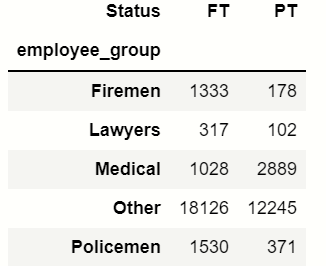


Now try compute the expected frequencies doing the calculations with the individual probabilities. Remember that the Chi2 test assumes that both variables (employee_group and FT/PT) are not related (therefore they are independent). Therefore, to compute the expected frequencies you need to compute the probability of each cell and multiply it by the number of observations. ie:

$$\nu(x,y) = p(x,y) * N = p(x) * p(y) * N$$

bear in mind that in general: $p(x,y)\neq p(x)*p(y)$; the equality will only be true if x and y are independent. However, the null hypotheses says that **x and y are independent.** but that's what we're assuming with the null hypotheses.

where "x" is the "employee_group" and "y" the (FT/PT). 

In [ ]:
# Create an empty dataframe named "frequencies" to store the data.
# Your code here:

In [104]:
frequencies=pd.DataFrame()

In [ ]:
# Your code here: Compute Expected frequency of being "Firemen" and "FT". Store the solution in a variable named "firemen_ft"

In [132]:
N=employeegroupstatuscount.sum().sum()
print(N)

38119


In [133]:
prob_firemen=(employeegroupstatuscount.iloc[0,0]+employeegroupstatuscount.iloc[0,1])/employeegroupstatuscount.sum().sum()
print(prob_firemen)

0.03963902515805766


In [134]:
prob_FT=(employeegroupstatuscount.iloc[0,0]+employeegroupstatuscount.iloc[1,0]+employeegroupstatuscount.iloc[2,0]+employeegroupstatuscount.iloc[3,0]+employeegroupstatuscount.iloc[4,0])/employeegroupstatuscount.sum().sum()
print(prob_FT)

0.5859020436003043


In [136]:
firemen_ft=(prob_firemen*prob_FT)*N
print(firemen_ft)

885.2979878800596


885.2979878800596

In [137]:
# Your code here: Compute Expected frequency of being "Firemen" and "PT". Store the solution in a variable named "firemen_pt"
prob_firemen=(employeegroupstatuscount.iloc[0,0]+employeegroupstatuscount.iloc[0,1])/employeegroupstatuscount.sum().sum()
print(prob_firemen)

0.03963902515805766


In [138]:
prob_PT=(employeegroupstatuscount.iloc[0,1]+employeegroupstatuscount.iloc[1,1]+employeegroupstatuscount.iloc[2,1]+employeegroupstatuscount.iloc[3,1]+employeegroupstatuscount.iloc[4,1])/employeegroupstatuscount.sum().sum()
print(prob_FT)

0.5859020436003043


In [140]:
firemen_pt=(prob_firemen*prob_PT)*N
print(firemen_pt)

625.7020121199403


625.7020121199403

In [141]:
# Your code here: Compute Expected frequency of being "Lawyers" and "FT". Store the solution in a variable named "lawyers_ft"
prob_lawyer=(employeegroupstatuscount.iloc[1,0]+employeegroupstatuscount.iloc[1,1])/employeegroupstatuscount.sum().sum()
print(prob_lawyer)

0.010991893806238358


In [142]:
lawyers_ft=(prob_lawyer*prob_FT)*N
print(lawyers_ft)

245.49295626852748


245.49295626852748

In [143]:
# Your code here: Compute Expected frequency of being "Lawyers" and "PT". Store the solution in a variable named "lawyers_pt"
lawyers_pt=(prob_lawyer*prob_PT)*N
print(lawyers_pt)

173.5070437314725


173.5070437314725

In [144]:
# Your code here: Compute Expected frequency of being "Medical" and "FT". Store the solution in a variable named "medical_ft"
prob_medical=(employeegroupstatuscount.iloc[2,0]+employeegroupstatuscount.iloc[2,1])/employeegroupstatuscount.sum().sum()
medical_ft=(prob_medical*prob_FT)*N
print(medical_ft)

2294.9783047823917


2294.9783047823917

In [146]:
# Your code here: Compute Expected frequency of being "Medical" and "PT". Store the solution in a variable named "medical_pt"
medical_pt=(prob_medical*prob_PT)*N
print(medical_pt)

1622.021695217608


1622.021695217608

In [149]:
# Your code here: Compute Expected frequency of being "Other" and "FT". Store the solution in a variable named "other_ft"
prob_other=(employeegroupstatuscount.iloc[3,0]+employeegroupstatuscount.iloc[3,1])/employeegroupstatuscount.sum().sum()
other_ft=(prob_other*prob_FT)*N
print(other_ft)

17794.430966184842


17794.430966184842

In [150]:
# Your code here: Compute Expected frequency of being "Other" and "PT". Store the solution in a variable named "other_pt"
prob_other=(employeegroupstatuscount.iloc[3,0]+employeegroupstatuscount.iloc[3,1])/employeegroupstatuscount.sum().sum()
other_pt=(prob_other*prob_PT)*N
print(other_pt)

12576.569033815158


12576.569033815158

In [151]:
# Your code here: Compute Expected frequency of being "Policemen" and "FT". Store the solution in a variable named "policemen_ft"
prob_policemen=(employeegroupstatuscount.iloc[4,0]+employeegroupstatuscount.iloc[4,1])/employeegroupstatuscount.sum().sum()
policemen_ft=(prob_policemen*prob_FT)*N
print(policemen_ft)

1113.7997848841785


1113.7997848841785

In [152]:
# Your code here: Compute Expected frequency of being "Policement" and "PT". Store the solution in a variable named "policemen_pt"
prob_policemen=(employeegroupstatuscount.iloc[4,0]+employeegroupstatuscount.iloc[4,1])/employeegroupstatuscount.sum().sum()
policemen_pt=(prob_policemen*prob_PT)*N
print(policemen_pt)

787.2002151158215


787.2002151158215

* Store all the expected frequencies of "FT" employees in a list 
* Store all the "PT" employees into another list
* Create a dictionary with "FT" and "PT" as keys and as the values use the previous lists
* Create a dataframe with this dictionary using pd.DataFrame()

In [157]:
# Your code here:
FT_frequency=[firemen_ft,lawyers_ft,medical_ft,other_ft,policemen_ft]
print(FT_frequency)
PT_frequency=[firemen_pt,lawyers_pt,medical_pt,other_pt,policemen_pt]
print(PT_frequency)

[885.2979878800596, 245.49295626852748, 2294.9783047823917, 17794.430966184842, 1113.7997848841785]
[625.7020121199403, 173.5070437314725, 1622.021695217608, 12576.569033815158, 787.2002151158215]


In [158]:
frequency_dictionary={'FT':FT_frequency,'PT':PT_frequency}
print(frequency_dictionary)

{'FT': [885.2979878800596, 245.49295626852748, 2294.9783047823917, 17794.430966184842, 1113.7997848841785], 'PT': [625.7020121199403, 173.5070437314725, 1622.021695217608, 12576.569033815158, 787.2002151158215]}


In [159]:
frequency_df=pd.DataFrame(frequency_dictionary)
display(frequency_df)

,FT,PT
0,885.297988,625.702012
1,245.492956,173.507044
2,2294.978305,1622.021695
3,17794.430966,12576.569034
4,1113.799785,787.200215


,FT,PT
0,885.297988,625.702012
1,245.492956,173.507044
2,2294.978305,1622.021695
3,17794.430966,12576.569034
4,1113.799785,787.200215


Now use the "st.chi2_contingency()" from scipy.stats [documentation here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) to conduct a Chi2 test to determine if the diferences between employee groups are statistically significant using a 95% confidence level. Hint: fill the function with a dataframe of actual frequencies.

In [ ]:
# Your code here: (use the st.chi2_contingency() function from scipy.stats to compute:
# The Chi2 value
# The p-valueYea we 
# The expected frequencies.
# Ho: there is no relationship
# Ha: there bbis relationship differences
# p_value = P(table | Ho) = P(table | no relationship) = 1.51e-6 < 0.05

In [160]:
from scipy.stats import chi2_contingency

In [165]:
st.chi2_contingency(employeegroupstatuscount)

(2676.642333711905,
 0.0,
 4,
 array([[  885.29798788,   625.70201212],
        [  245.49295627,   173.50704373],
        [ 2294.97830478,  1622.02169522],
        [17794.43096618, 12576.56903382],
        [ 1113.79978488,   787.20021512]]))

In [166]:
st.chi2.ppf(0.95,df=4)

9.487729036781154

(2676.642333711905, 0.0, 4, array([[  885.29798788,   625.70201212],
        [  245.49295627,   173.50704373],
        [ 2294.97830478,  1622.02169522],
        [17794.43096618, 12576.56903382],
        [ 1113.79978488,   787.20021512]]))

Check if your expected frequencies aggree with the ones obtained with the st.chi2_contingency() function

The chi2 of 2676 is > critical value of 9.48 and the p value of 0 is < alpha of 0.05. So reject H0. There is a dependency between the job group and type of employement being full time or part time. 